In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 파이썬의 머신러닝 패키지
!pip install scikit-learn

In [3]:
# 깃허브에서 파일 불러오기
data = pd.read_csv('http://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 찾기
- .isna() 함수 사용

In [5]:
# 각 컬럼 별로 결측치가 몇 개인지 볼 수 있음
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치 / 전체데이터 * 100 = 결측치 비율

In [6]:
# 결측치 비율
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

결측치가 30%가 넘으면 사용하기 힘듦.
그런 경우 삭제하는 것이 보통

## age와 cabin, embarked에 결측값 발견 후 처리

### 1) 단순대치법

- 완전 분석 -> 결측값이 있는 모든 행을 삭제하고 완전한 자료만으로 분석
- .dropna() -> 결측값이 있는 모든 행 삭제
- 결측값을 삭제해도 모델을 만들기에 충분히 많은 데이터가 있는 경우에 사용
- 결측값을 삭제한 후에도 데이터의 편향이 없다는 전제가 있을 때에만 사용

In [7]:
# 재할당을 해야 함
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
# 20%의 데이터만 남아 활용 불가
183 / 891 * 100

20.53872053872054

### 2) 평균대치법 : 결측치가 있는 컬럼에서 데이터의 평균을 구한 후 결측값을 대치
- 평균을 이용하기 때문에 간편
- 데이터에 이상치가 있을 경우 평균을 이용할 수가 없음
- 데이터에 이상치가 있는 경우 중앙값이나 최빈값을 고려해야 함

In [9]:
a = pd.Series([24, 5, 10, 34, 20, 18, 28, 20])
a.mean()

19.875

In [10]:
b = pd.Series([24, 5, 10, 34, 20, 18, 28, 200])
b.mean()

42.375

In [11]:
c = pd.Series([24, 5, 10, 34, 20, 18, 28, 20])
c.median()

20.0

In [12]:
# 만약 수의 갯수가 짝수이면 중앙값 두 값의 평균값을 반환
d = pd.Series([24, 5, 10, 34, 20, 18, 28, 200])
d.median()

22.0

전체 데이터 프레임에서 Age 컬럼에 결측값이 있는 행만 추출

In [13]:
data[data['Age'].isna()]
# data[data['Age'].isna() == True] 도 같음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


결측값이 있는 컬럼을 나중에 다시 확인하고 싶을 때 <br>
1. .isna() == True로 결측값이 있는 컬럼 추출
2. 추출된 데이터프레임 인덱스 추출 -> .index()로 가능
3. 추출한 인덱스를 변수에 저장
4. 데이터프레임.iloc[index]로 조회

In [14]:
na_index = data[data['Age'].isna()].index
na_index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [15]:
data.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


- .fillna(대치할 값)으로 값 대치하기

In [16]:
# 평균으로 대치
# 할당을 해야 함
data['Age'].fillna(round(data['Age'].mean()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
# 중앙값으로 대치
# 할당을 해야 함
data['Age'].fillna(round(data['Age'].median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
# 최빈값으로 대치
# 할당을 해야 함
data['Age'].fillna(data['Age'].mode())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

scikit-learn 라이브러리의 SimpleImputer : 평균, 중앙값, 최빈값 대치가 가능

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
# 평균으로 대치
imp_mean = SimpleImputer(strategy = "mean")
imp_mean.fit_transform(data["Age"].values.reshape(-1,1))[:,0]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [21]:
# 중앙값으로 대치
imp_median = SimpleImputer(strategy = "median")
imp_median.fit_transform(data["Age"].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 28.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 28.  ,
       31.  , 28.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 28.  ,
       19.  , 28.  , 28.  , 40.  , 28.  , 28.  , 66.  , 28.  , 42.  ,
       28.  , 21.  , 18.  , 14.  , 40.  , 27.  , 28.  ,  3.  , 19.  ,
       28.  , 28.  , 28.  , 28.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 28.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 28.  , 28.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 28.  , 28.  ,  0.83, 30.  , 22.  ,
       29.  , 28.  , 28.  , 17.  , 33.  , 16.  , 28.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 28.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 28.  , 21.  , 33.  , 37.  , 28.  , 21.  , 28.  ,
       38.  , 28.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 28.  , 32.5 , 32.5 , 54.  , 12.  ,
       28.  , 24.  ,

In [22]:
# 최빈값으로 대치
imp_most_frequent = SimpleImputer(strategy = "most_frequent")
imp_most_frequent.fit_transform(data["Age"].values.reshape(-1,1))[:,0]

array([22.  , 38.  , 26.  , 35.  , 35.  , 24.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 24.  ,
       31.  , 24.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  , 24.  ,
       19.  , 24.  , 24.  , 40.  , 24.  , 24.  , 66.  , 28.  , 42.  ,
       24.  , 21.  , 18.  , 14.  , 40.  , 27.  , 24.  ,  3.  , 19.  ,
       24.  , 24.  , 24.  , 24.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  , 24.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  , 24.  , 24.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  , 24.  , 24.  ,  0.83, 30.  , 22.  ,
       29.  , 24.  , 28.  , 17.  , 33.  , 16.  , 24.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  , 24.  , 71.  , 23.  , 34.  ,
       34.  , 28.  , 24.  , 21.  , 33.  , 37.  , 28.  , 21.  , 24.  ,
       38.  , 24.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  , 24.  , 32.5 , 32.5 , 54.  , 12.  ,
       24.  , 24.  ,

In [23]:
data_mean = data.copy()
data_median = data.copy()
data_mode = data.copy()

In [24]:
data_mean['Age'] = data_mean['Age'].fillna(round(data_mean['Age'].mean()))

In [25]:
data_mean.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,30.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,30.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,30.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,30.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,30.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,NaN,S


In [26]:
data_median['Age'] = data_mean['Age'].fillna(round(data_mean['Age'].median()))
data_median.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,30.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,30.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,30.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,30.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,30.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,30.0,0,0,349217,7.8958,NaN,S


In [27]:
data_mode['Age'] = data_mode['Age'].fillna(24.0)
data_mode.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,24.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,24.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,24.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,24.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,24.0,0,0,349217,7.8958,NaN,S


- KNN(K-neariest Neighbors) 최근접이웃 대치법

In [28]:
from sklearn.impute import KNNImputer

In [29]:
data_knn = data.copy()

In [30]:
knn_imputer = KNNImputer(n_neighbors = 5)
data_knn['Age'] = knn_imputer.fit_transform(data_knn['Age'].values.reshape(-1,1))[:,0]

In [31]:
data_knn.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


### 깊은 복사와 얕은 복사

In [32]:
# copy()로 하는 건 깊은 복사
data_test = data.copy()
data_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
# 이렇게 할당하는 것은 얕은 복사 = 이름만 바꿔서 한다는 개념이랑 같다고 보면 됨
data_test2 = data_test

In [34]:
data_test2["Age"] = data_test2["Age"].fillna(25)

In [35]:
data_test2.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S


In [36]:
# data_test2 에서 작업한 것이 data_test에도 반영이 되어 있음
data_test.iloc[na_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,25.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,25.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S


위 경우처럼 테스트를 할 땐 깊은 복사를 해야 함. 깊은 복사를 하는 방법은 copy() 함수 사용

In [37]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# cabin 컬럼은 결측값 비율이 77%라서 삭제
del data_mean['Cabin']
data_mean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [39]:
data_median = data_median.drop("Cabin", axis = 1)
data_median

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [40]:
data_mode.drop("Cabin", axis = 1, inplace=True)
data_mode

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [41]:
data_mode['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

범주형 자료는 최빈값으로 대치

In [42]:
data_mode["Embarked"] = data_mode['Embarked'].fillna('S')
data_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [43]:
data_mean["Embarked"] = data_mean['Embarked'].fillna('S')
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [44]:
data_median["Embarked"] = data_median['Embarked'].fillna('S')
data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
del data_knn["Cabin"]
data_knn["Embarked"] = data_knn['Embarked'].fillna('S')
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [46]:
t = pd.Series([10,12,14,15,18,20,100])

In [47]:
t.mean()

27.0

# 이상값
- 이상값이란 전체 데이터 분표에서 정상 범위에 속하지 않는 데이터
- z-score가 3 ~ -3 범위를 벗어나는 경우
- 평균을 기준으로 평균에서 표준편차 +- 3을 넘는 값
- IQR(사분위수)를 기준 이상값
    - 하위 이상값 : Q1 - 1.5 * IQR 미만인 값
    - 상위 이상값 : Q3 + 1.5 * IQR 초과인 값
    - IQR = Q3 - Q1

- box plot 그리고 이상값 탐지하기

<Axes: >

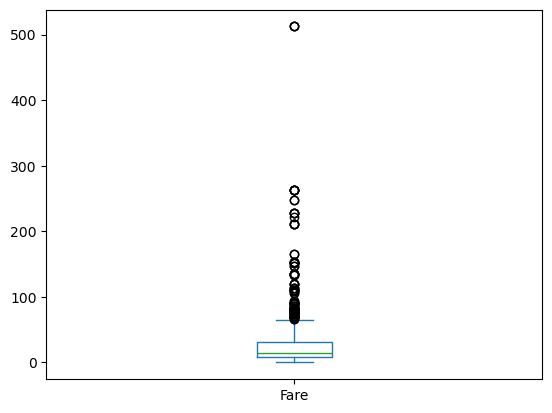

In [48]:
data['Fare'].plot(kind = 'box')

<Axes: >

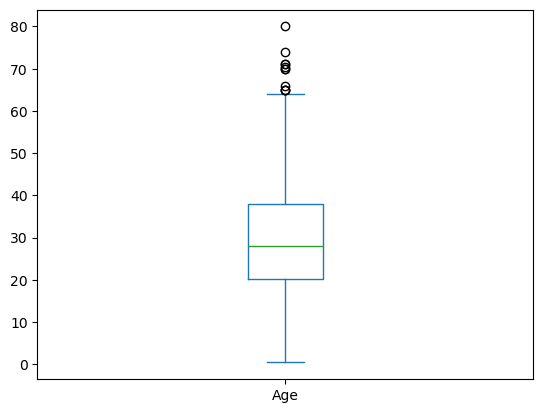

In [49]:
data['Age'].plot(kind = 'box')

In [50]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [51]:
# describe 함수로 구한 Q1, Q3로 이상치 범위 구하기
minimum = 7.910400 - (1.5 * (31.000000-7.910400))
maximum = 31.000000 + (1.5 * (31.000000-7.910400))
print(minimum, maximum)

-26.724 65.6344


In [52]:
data[data['Fare'] > 65.6344]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [53]:
data[['Pclass','Fare']].groupby("Pclass").mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [54]:
data[['Pclass','Fare']].groupby("Pclass").describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [55]:
# 1등급 선실 티켓의 정상범위
93.5 + 1.5 * (93.5 - 30.92395)

187.36407499999999

In [56]:
# 2등실의 정상범위
26.0 + 1.5 * (26.0 - 13.00000)

45.5

In [57]:
# 1등실의 정상범위
15.5 + 1.5 * (15.5 - 7.75000)

27.125

## winsorlization 윈저화 : 이상치를 처리하는 방법
- IQR로 구한 정상범위 최댓값을 이용해서 정상범위를 넘어가는 값을 정상범위 최댓값으로 대치

In [58]:
outliers = data[data['Fare'] > 187.36407499999999]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [59]:
outliers['Fare'] = 187.36407499999999
outliers

C:\Users\5-08\AppData\Local\Temp\ipykernel_5492\1407898276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Fare'] = 187.36407499999999


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,187.364075,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,187.364075,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,187.364075,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,187.364075,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,187.364075,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,187.364075,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,187.364075,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,187.364075,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,187.364075,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,187.364075,C23 C25 C27,S


In [60]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [61]:
# 상관관계는 -1 ~ 1까지 있음
# 상관관계가 1이면 정비례
# 상관관계가 -1이면 반비례
# 상관관계가 0이면 관계가 없음
data[['Pclass', 'Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [62]:
data[['Pclass', 'Survived', "Fare", "Age"]].corr()

,Pclass,Survived,Fare,Age
Pclass,1.000000,-0.338481,-0.549500,-0.369226
Survived,-0.338481,1.000000,0.257307,-0.077221
Fare,-0.549500,0.257307,1.000000,0.096067
Age,-0.369226,-0.077221,0.096067,1.000000


## 데이터 전처리를 안하고 알고리즘에 넣었을 때 생기는 일

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [64]:
X = data.drop("Survived", axis = 1)
y = data['Survived']

In [65]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [67]:
# test_size 옵션은 테스트로 n%의 데이터를 사용한다는 뜻
# random_state 옵션은 랜덤하게 데이터를 뽑는데 모델을 재훈련시킬 때 같은 인덱스에 있는 데이터를 훈련시키기 위해 사용함. 아이디 같은 거임
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [68]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# X_train으로 훈련한 모델을 통해 X_test에 있는 데이터로 예측을 한 값을 pred에 넣기
pred = dtc.predict(X_test)
print(y_test, pred)

# 이렇게 하면 오류가 남. 문자 데이터가 있기 때문

ValueError: could not convert string to float: 'Strom, Miss. Telma Matilda'

## EDA 탐색적 데이터 분석

### 범주형 자료를 숫자로 변환하기

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
data = data.drop(["Name", "Cabin"], axis = 1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [71]:
data.drop("Ticket", axis = 1, inplace = True)
data.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [72]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

성별 컬럼을 숫자로 변환하기
- .str.replace() 함수를 사용해 숫자로 변환
- .apply(lambda 함수)를 사용해 숫자로 변환
- label encoder를 사용해 숫자로 변환
- one-hot encoder를 사용해 숫자로 변환
- get_dummies를 사용해 더미변수화 하기

In [73]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()
data5 = data.copy()

#### .str.replace() 함수를 사용해서 변환

In [74]:
data1["Sex"] = data1["Sex"].str.replace("female", '1').str.replace("male", '0')

In [75]:
data1["Sex"] = data1["Sex"].astype(int)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 59.3+ KB


In [76]:
data1["Embarked"] = data1["Embarked"].fillna('S')

In [77]:
data1["Embarked"] = data1["Embarked"].str.replace("S", "0").str.replace("C", "1").str.replace("Q", "2")

In [78]:
data1["Embarked"] = data1["Embarked"].astype('int')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [79]:
data1["Age"] = data1["Age"].fillna(data1["Age"].mean())
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


In [80]:
X = data1.drop("Survived", axis = 1)
y = data1["Survived"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# X_train으로 훈련한 모델을 통해 X_test에 있는 데이터로 예측을 한 값을 pred에 넣기
pred = dtc.predict(X_test)
# 데이터프레임화해서 보기 좋게 만들기
result = pd.DataFrame({"실제값" : y_test, "예측값" : pred})
result

,실제값,예측값
350,0,0
176,0,0
723,0,0
404,0,0
306,1,1
...,...,...
283,1,0
715,0,0
650,0,0
808,0,0


In [83]:
from sklearn.metrics import accuracy_score, classification_report

In [84]:
# 정답률
print(accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

0.6815642458100558
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       108
           1       0.59      0.63      0.61        71

    accuracy                           0.68       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.69      0.68      0.68       179



apply 함수 활용해 범주형 변수를 명목형, 서열형 변수로 바꾸기

In [85]:
# 조건표현식이 어렵다면 함수를 만들기
def sex2num(x) :
    if x == "female" :
        return 1
    else :
        return 0

In [86]:
data2["Sex"].apply(lambda x : sex2num(x))

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [87]:
data2["Sex"] = data2["Sex"].apply(lambda x : 1 if x == "female" else 0)
data2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
888,889,0,3,1,NaN,1,2,23.4500,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [88]:
data2["Embarked"] = data2["Embarked"].fillna("S")
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [89]:
# lambda 함수로 불가해서 함수로 만들기
def em2num(x) :
    if x == "S" :
        return 0
    elif x == "C" :
        return 1
    else :
        return 2

In [90]:
# 함수로 만들면 data2["Embarked"].apply(em2num) 이렇게 해도 됨
data2["Embarked"] = data2["Embarked"].apply(lambda x : em2num(x))
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


## label encoder를 사용해서 범주형 변수 변환
- from sklearn.preprocessing import LabelEncoder로 임포트하기
- le = LabelEncoder() -> 레이블 인코더 인스턴스 생성
- data["Sex'] = le.fit_transform(data['Sex']) -> 성별 컬럼 안에 있는 카테고리 male과 female이 숫자 0, 1로 변환됨
- le.inverse_transform([변환할 숫자]) -> 숫자로 변환된 것을 다시 문자로 되돌리고 싶을 때

- 변환할 카테고리 변수 수 만큼 인스턴스를 생성해야 나중에 복원이 가능
- le => Sex 컬럼 / le2 => Embarked 컬럼

label encoder를 사용해서 embarked를 숫자형 데이터로 변환

In [91]:
data3['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [92]:
data3['Embarked'] = data3['Embarked'].fillna("S")

In [93]:
data3['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [94]:
# 레이블인코더 import
from sklearn.preprocessing import LabelEncoder
# labelencoder 인스턴스 생성
le2 = LabelEncoder()
data3['Embarked'] = le2.fit_transform(data3['Embarked'])
data3['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [95]:
le2.inverse_transform(data3['Embarked'])

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [96]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

## one-hot encoder

In [97]:
data4.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [98]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(data4[['Sex']])
print(result)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (866, 0)	1.0
  (867, 1)	1.0
  (868, 1)	1.0
  (869, 1)	1.0
  (870, 1)	1.0
  (871, 0)	1.0
  (872, 1)	1.0
  (873, 1)	1.0
  (874, 0)	1.0
  (875, 0)	1.0
  (876, 1)	1.0
  (877, 1)	1.0
  (878, 1)	1.0
  (879, 0)	1.0
  (880, 0)	1.0
  (881, 1)	1.0
  (882, 0)	1.0
  (883, 1)	1.0
  (884, 1)	1.0
  (885, 0)	1.0
  (886, 1)	1.0
  (887, 0)	1.0
  (888, 0)	1.0
  (889, 1)	1.0
  (890, 1)	1.0


## get_dummies로 더미 변수 만들어 one-hot 인코더하기

In [99]:
data5.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


- get_dummies를 사용하면 카테고리 갯수만큼 컬럼이 증가하므로 다중공선성 문제가 발생할 수 있음
- 컬럼 수 증가를 최소화하기 위해 drop_first라는 옵션을 써서 컬럼 수를 감소시켜야 함

In [100]:
pd.get_dummies(data5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,889,0,3,NaN,1,2,23.4500,True,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [101]:
# 할당을 해줘야 함
data5 = pd.get_dummies(data5, columns = ["Pclass", "Sex", 'Embarked'], drop_first = True)

In [102]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Pclass_2     891 non-null    bool   
 7   Pclass_3     891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [103]:
data5["Age"] = data5["Age"].fillna(data5["Age"].mean())
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Pclass_2     891 non-null    bool   
 7   Pclass_3     891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(4)
memory usage: 46.2 KB


In [104]:
X = data5.drop("Survived", axis = 1)
y = data5["Survived"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [106]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# X_train으로 훈련한 모델을 통해 X_test에 있는 데이터로 예측을 한 값을 pred에 넣기
pred = dtc.predict(X_test)
# 데이터프레임화해서 보기 좋게 만들기
result = pd.DataFrame({"실제값" : y_test, "예측값" : pred})
result

,실제값,예측값
350,0,0
176,0,1
723,0,0
404,0,0
306,1,1
...,...,...
283,1,1
715,0,0
650,0,0
808,0,0


In [107]:
from sklearn.metrics import accuracy_score, classification_report
# 정답률
print(accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

0.6983240223463687
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       108
           1       0.61      0.68      0.64        71

    accuracy                           0.70       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.71      0.70      0.70       179



### 변수 간에 상관관계 분석하기
- 상관관계는 -1부터 1까지의 범위를 가짐
- -1에 가까우면 음의 상관관계가 있음 = 두 변수가 반비례 관계가 있음
- 0은 아무런 관계가 없음
- 1에 가까우면 양의 상관관계가 있음 = 두 변수가 정비례 관계가 있음

- pearson 상관관계 분석은 연속형 데이터들 간의 상관관계
- spearman 상관관계 분석은 서열형, 카테고리형(범주형) 데이터를 포함해서 상관관계를 계산

In [108]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [110]:
data['Embarked'] = data["Embarked"].fillna("S")
data["Age"] = data["Age"].fillna(data["Age"].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [111]:
data = data.drop("PassengerId", axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [112]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [113]:
data_corr = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


### 인과관계와 상관관계는 구분해야 한다
- 온도가 증가하면 에어컨 사용량이 증가한다라는 명제가 있을 때 양의 상관관계는 있지만 인과관계에 있느냐 하는 것은 다른 문제(이 명제는 인과관계가 있긴 함)
- 초등학교가 많으면 범죄율이 증가한다라는 명제가 있을 때 양의 상관관계는 있지만 인과관계는 될 수 없음

- seaborn을 활용해 표 그리기

In [114]:
!pip install seaborn

In [115]:
import seaborn as sns

<Axes: >

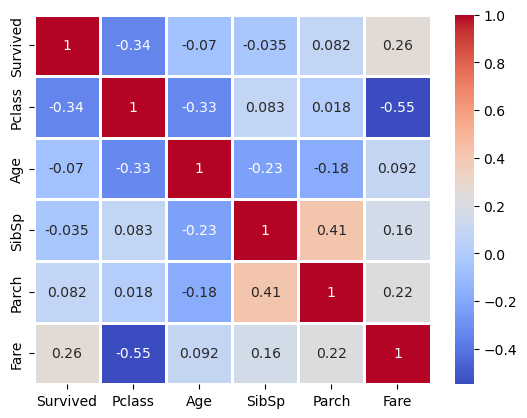

In [116]:
sns.heatmap(data_corr, cmap = 'coolwarm', annot = True, linewidth = 1, linecolor = 'white')

In [117]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data["Sex"])
le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(data["Embarked"])

In [118]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [119]:
data_corr2 = data.corr(method = 'spearman')
data_corr2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.339668,-0.543351,-0.039109,0.088879,0.138266,0.323736,-0.160196
Pclass,-0.339668,1.000000,0.135775,-0.308875,-0.043019,-0.022801,-0.688032,0.091977
Sex,-0.543351,0.135775,1.000000,0.067809,-0.195204,-0.254512,-0.259593,0.115412
Age,-0.039109,-0.308875,0.067809,1.000000,-0.147035,-0.217290,0.118847,-0.024295
SibSp,0.088879,-0.043019,-0.195204,-0.147035,1.000000,0.450014,0.447113,0.011157
Parch,0.138266,-0.022801,-0.254512,-0.217290,0.450014,1.000000,0.410074,0.028365
Fare,0.323736,-0.688032,-0.259593,0.118847,0.447113,0.410074,1.000000,-0.074873
Embarked,-0.160196,0.091977,0.115412,-0.024295,0.011157,0.028365,-0.074873,1.000000


<Axes: >

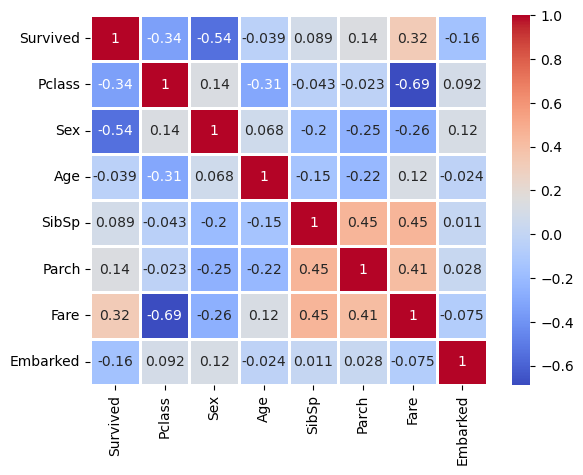

In [120]:
sns.heatmap(data_corr2, cmap = 'coolwarm', annot = True, linewidth = 1, linecolor = 'white')

In [121]:
# 성별 중 어떤 게 0과 1인지
le_sex.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [122]:
# embarked 중 어떤 게 0과 1인지
le_embarked.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

## 각 컬럼별 데이터 분포 파악 및 시각화

<Axes: xlabel='Survived'>

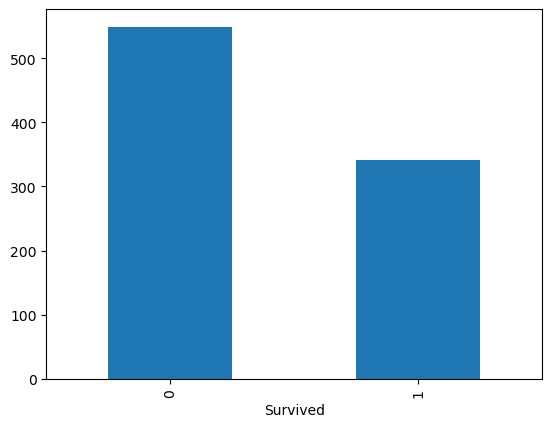

In [123]:
# 막대 그래프 그리기
data["Survived"].value_counts().plot(kind = 'bar')

In [124]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

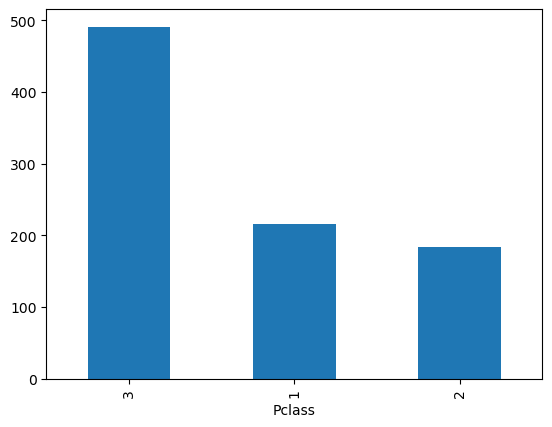

In [125]:
data['Pclass'].value_counts().plot(kind = 'bar')

In [126]:
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

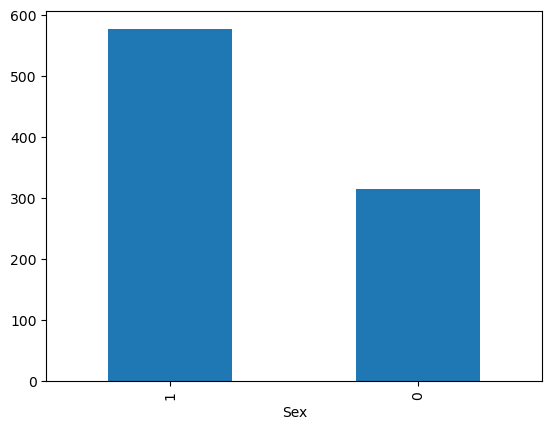

In [127]:
data['Sex'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Age', ylabel='Count'>

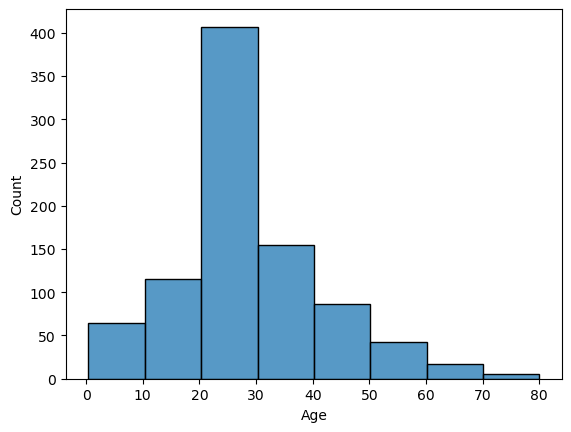

In [128]:
sns.histplot(data['Age'], bins = 8)

In [129]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='SibSp'>

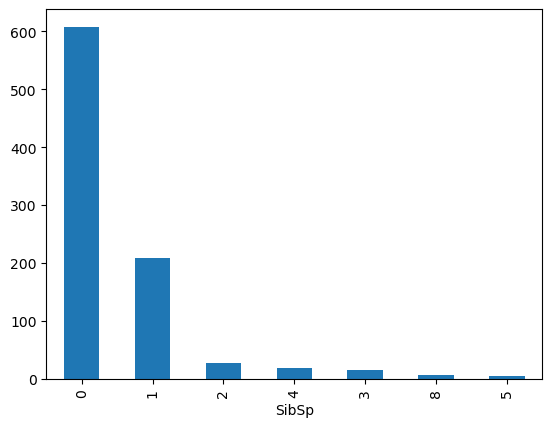

In [130]:
data['SibSp'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Parch'>

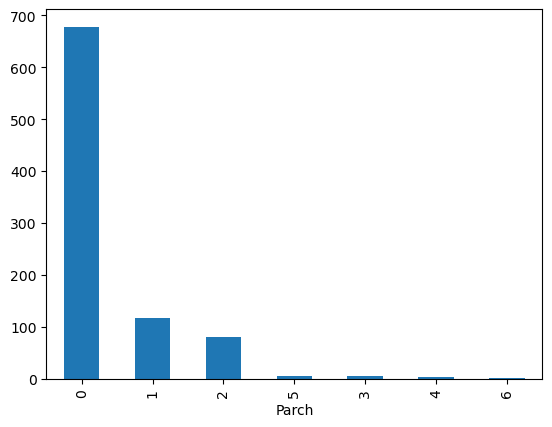

In [131]:
data['Parch'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

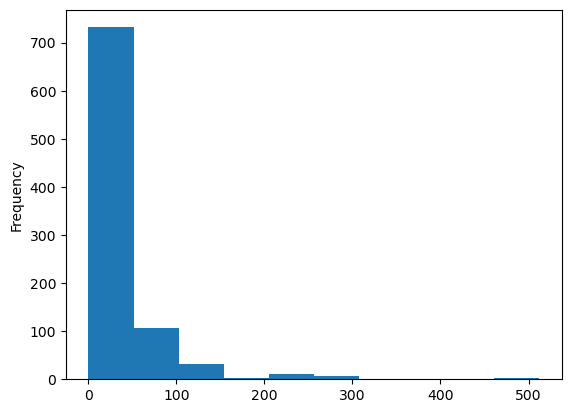

In [132]:
data['Fare'].plot(kind = 'hist')

<Axes: xlabel='Fare', ylabel='Count'>

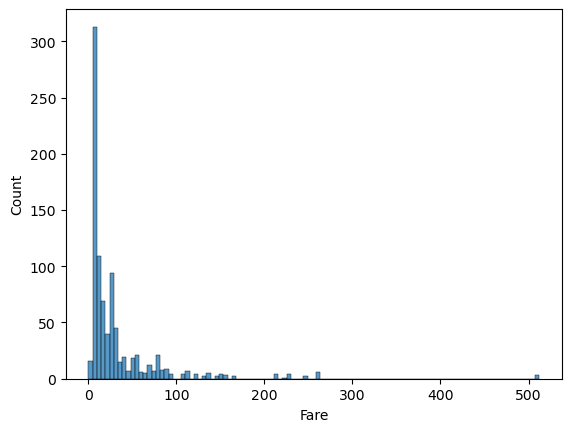

In [133]:
sns.histplot(data['Fare'])

<Axes: xlabel='Embarked'>

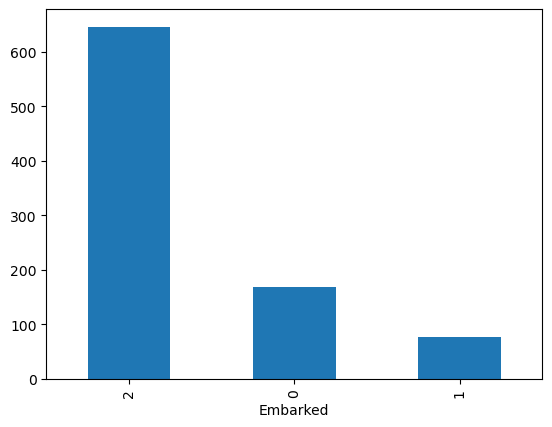

In [134]:
data['Embarked'].value_counts().plot(kind = 'bar')

In [135]:
le2.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

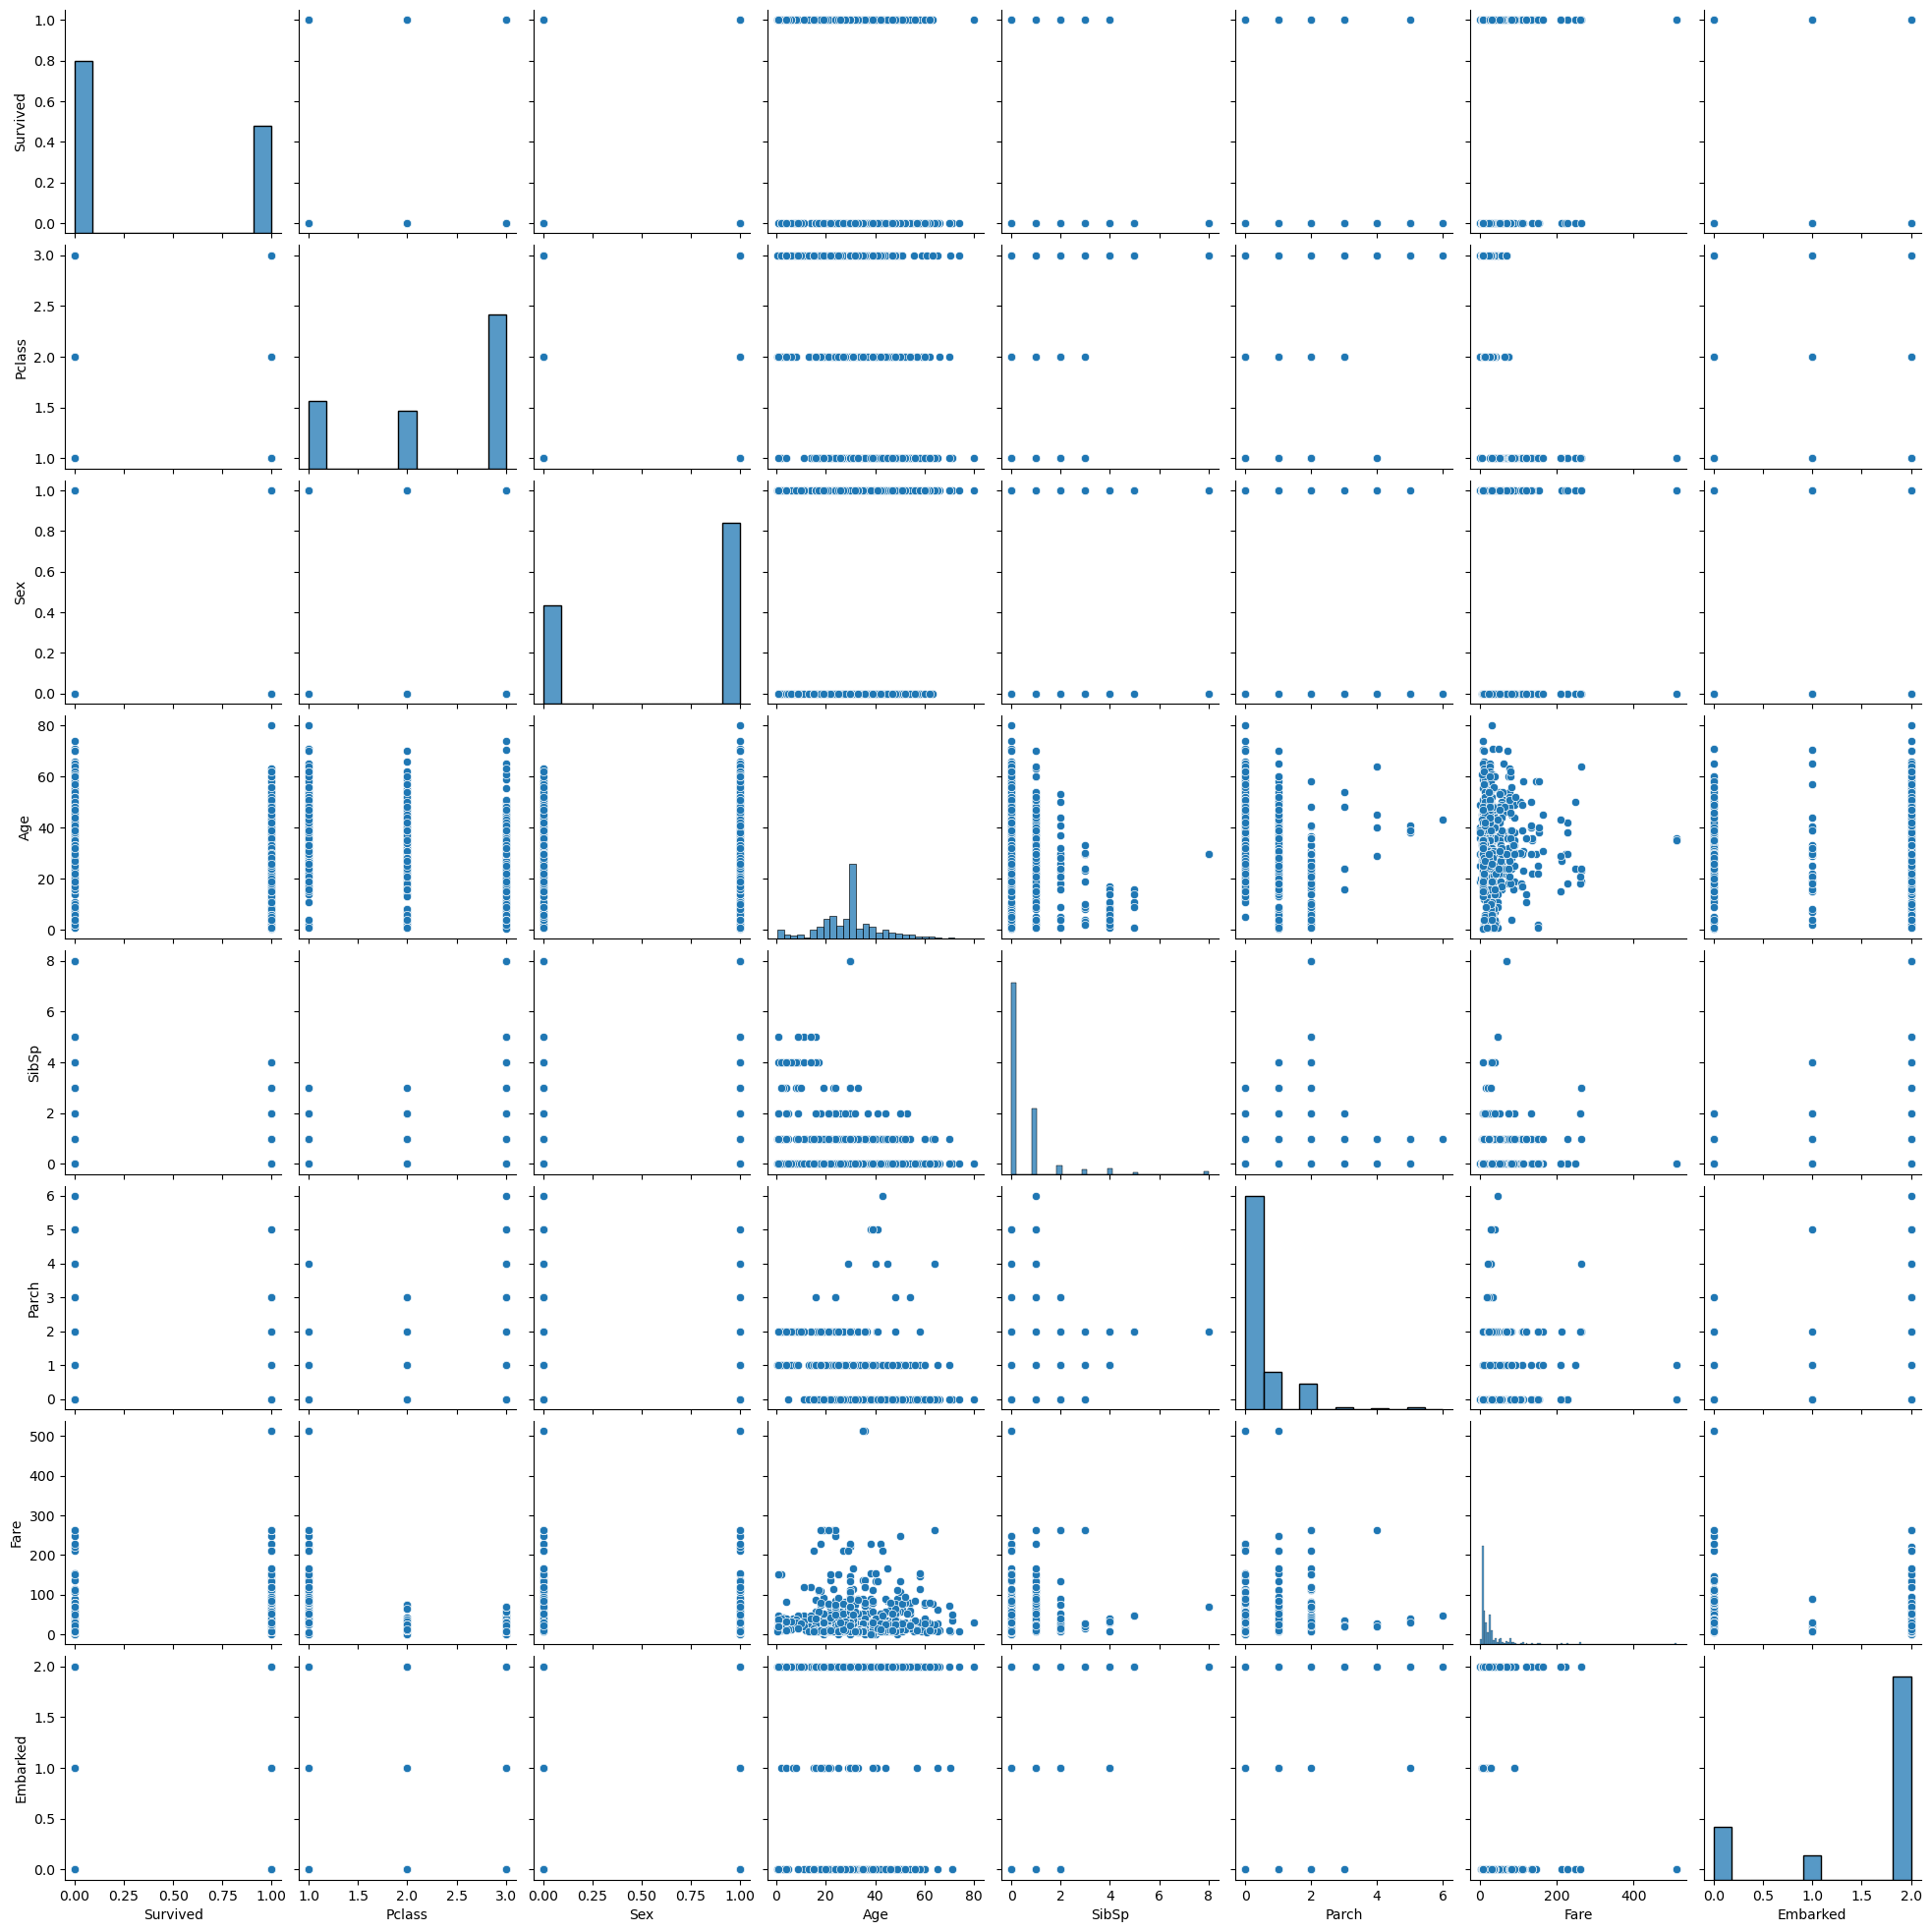

In [136]:
sns.pairplot(data)

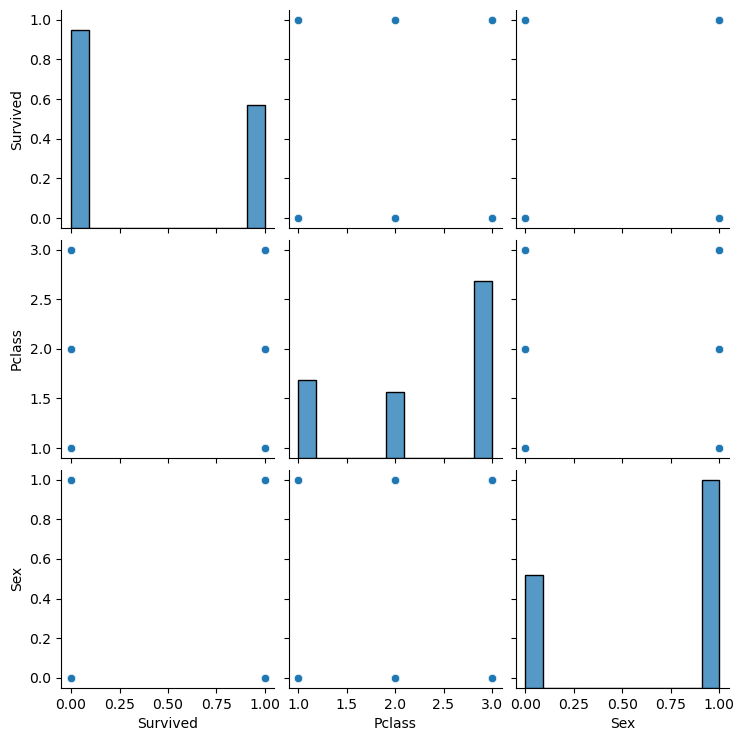

In [137]:
sns.pairplot(data[['Survived', 'Pclass', 'Sex']])

# groupby로 독립변수와 종속변수간 규칙 찾기

In [138]:
data[['Survived', 'Pclass']].groupby("Pclass").value_counts(sort = False)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass,Survived'>

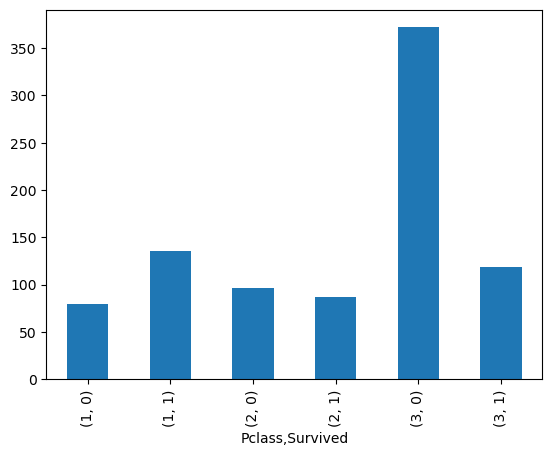

In [139]:
data[['Survived', 'Pclass']].groupby("Pclass").value_counts(sort = False).plot(kind = 'bar')

- plcass가 1인 경우 생존이 사망보다 많음
- plcass가 2인 경우 사망이 생존보다 많음
- plcass가 3인 경우 생존이 사망보다 많음

In [140]:
data[['Survived', 'Sex']].groupby("Sex").value_counts(sort = False)

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: count, dtype: int64

<Axes: xlabel='Sex,Survived'>

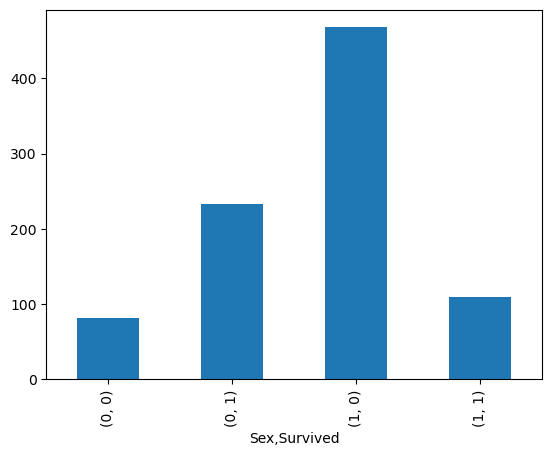

In [141]:
data[['Survived', 'Sex']].groupby("Sex").value_counts(sort = False).plot(kind = 'bar')

- 성별이 여성인 경우 생존율이 높음
- 성별이 남성인 경우 생존율이 낮음

In [142]:
data[['Survived', 'Age']].groupby("Age").value_counts(sort = False)

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: count, Length: 144, dtype: int64

In [143]:
data[['Survived', 'SibSp']].groupby("SibSp").value_counts(sort = False)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

<Axes: xlabel='SibSp,Survived'>

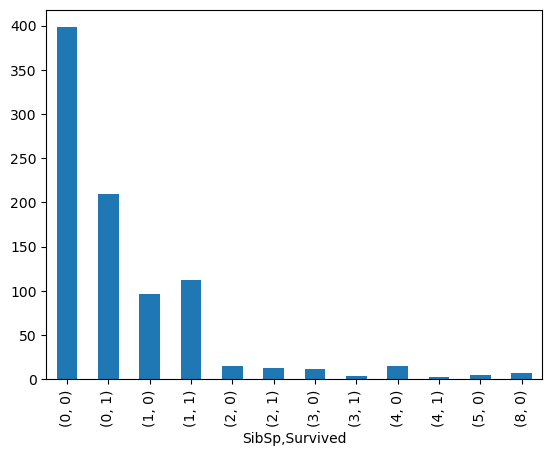

In [144]:
data[['Survived', 'SibSp']].groupby("SibSp").value_counts(sort = False).plot(kind = 'bar')

<Axes: xlabel='Embarked,Survived'>

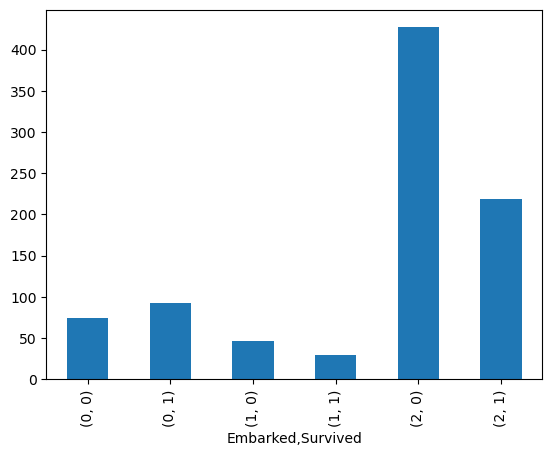

In [145]:
data[['Survived', 'Embarked']].groupby("Embarked").value_counts(sort = False).plot(kind = 'bar')
# data.groupby("Embarked")["Survived"].value_counts(sort=False).plot(kind = 'bar')

## 연속형 데이터인 경우 구간화를 통해 명목변수로 변환

조건문으로 age 컬럼 구간화하기

In [146]:
def ages(x) :
    if 0 < x < 10 :
        return "under10"
    elif 10 <= x < 20 :
        return "10s"
    elif 20 <= x < 30 :
        return "20s"
    elif 30 <= x < 40 :
        return "30s"
    elif 40 <= x < 50 :
        return "40s"
    elif 50 <= x < 60 :
        return "50s"
    elif 60 <= x < 70 :
        return "60s"
    elif 70 <= x < 80 :
        return "70s"
    elif 80 <= x < 90 :
        return "80s"

In [147]:
data["Age"] = data["Age"].apply(ages)

In [148]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,20s,1,0,7.2500,2
1,1,1,0,30s,1,0,71.2833,0
2,1,3,0,20s,0,0,7.9250,2
3,1,1,0,30s,1,0,53.1000,2
4,0,3,1,30s,0,0,8.0500,2


<Axes: xlabel='Age,Survived'>

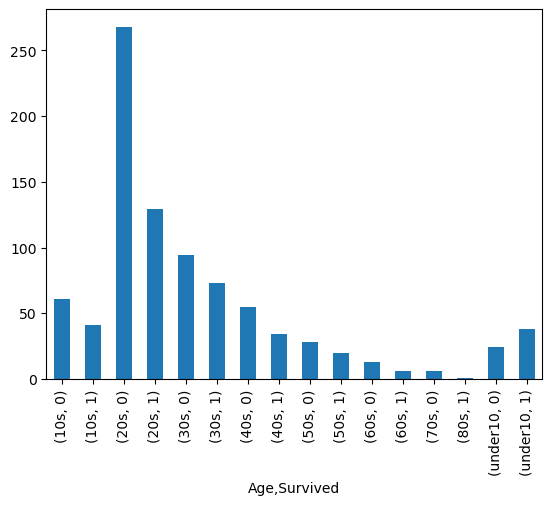

In [149]:
data[['Age', "Survived"]].groupby("Age").value_counts(sort=False).plot(kind = 'bar')

pclass별 성별별 생존율

<Axes: xlabel='Pclass,Sex,Survived'>

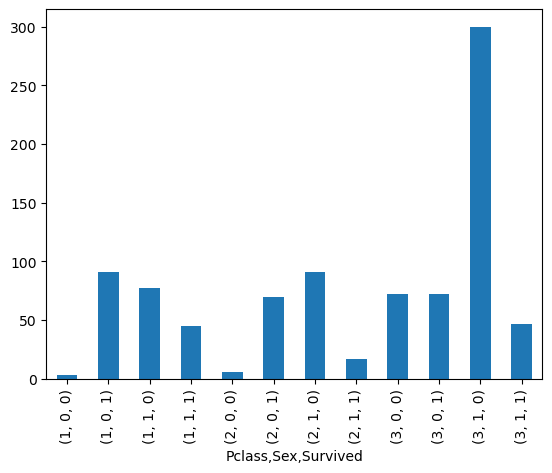

In [150]:
data.groupby(['Pclass', 'Sex'])["Survived"].value_counts(sort = False).plot(kind = 'bar')

In [151]:
data = data.drop('Fare', axis = 1)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,20s,1,0,2
1,1,1,0,30s,1,0,0


## feature engineering (변수 선택, 새로운 변수 생성)

In [152]:
data['Family'] = data["SibSp"] + data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,1,20s,1,0,2,1
1,1,1,0,30s,1,0,0,1
2,1,3,0,20s,0,0,2,0
3,1,1,0,30s,1,0,2,1
4,0,3,1,30s,0,0,2,0


In [153]:
data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,20s,2,1
1,1,1,0,30s,0,1
2,1,3,0,20s,2,0
3,1,1,0,30s,2,1
4,0,3,1,30s,2,0


## 카테고리 변수의 더미변수화 get_dummies

In [154]:
data = pd.get_dummies(data, columns = ["Sex", "Age", "Embarked", "Family"], drop_first = True)

### 종속변수(y)와 독립변수(x) 분리

In [155]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [156]:
X

,Pclass,Sex_1,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under10,Embarked_1,Embarked_2,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,3,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,3,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
887,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
888,3,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
889,1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [157]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [159]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report)

0.7988826815642458
<function classification_report at 0x000002077FDD4280>


# 지금까지 한 거 정리
1. 타이타닉 데이터 로딩
2. 데이터 전처리(데이터 타입 변환, 결측치 정리, 이상값 탐지)
3. EDA(탐색적 데이터 분석 - 각 컬럼별 데이터 분포 value_countes, 그래프, 상관분석, groupby로 타깃 변수(종속변수)와의 관계 분석)
4. feature engineering - 변수 선택, 새로운 특성 생성, 카테고리 변수의 더미변수화/label encoding(문자 -> 숫자)
5. 최종 선택된 독립변수(x), 종속변수(y)로 나누기
6. train_test_split을 이용해 train(훈련용 데이터), test(검증용 데이터)로 나누기(홀드 아웃이라고 함)
7. 분류 알고리즘을 불러와서 훈련(학습) -> 분류 모델 생성
8. 모델의 성능 평가(accuacy_score 정확도)
9. 모델 성능 개선 -> 4 ~ 8 반복 + 하이퍼 파라미터 튜닝

- 정확도 Accuracy : 정답을 정답으로 맞추고, 오답을 오답으로 맞춘 것 -> 타이타닉 데이터에선 생존자를 생존으로, 사망자를 사망으로 맞춘 것
- f1-score가 높은 게 좋은 거.
- 분석 목적에 따라 중요지표가 달라지므로 항상 기억하기

## 훈련데이터와 테스트데이터 비율 변화로 성능 개선하기

In [160]:
for ts in range(1,10) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts/10, random_state = 8)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(ts,"0퍼센트",accuracy_score(y_test, pred))
    print(classification_report(y_test,pred))
    print('---------------------------')

1 0퍼센트 0.8
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.69      0.78      0.74        32

    accuracy                           0.80        90
   macro avg       0.78      0.80      0.79        90
weighted avg       0.81      0.80      0.80        90

---------------------------
2 0퍼센트 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       108
           1       0.80      0.66      0.72        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

---------------------------
3 0퍼센트 0.8208955223880597
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       168
           1       0.87      0.61      0.72       100

    accuracy                           0.82       268
   macro 

## 하이퍼 파라미터 튜닝으로 성능 개선하기

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [162]:
for i in range(1,10) :
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test,pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7985074626865671
3               precision    recall  f1-score   support

           0       0.77      0.96      0.86       168
           1       0.88      0.53      0.66       100

    accuracy                           0.80       268
   macro avg       0.83      0.74      0.76       268
weigh

In [163]:
dtc = DecisionTreeClassifier(max_depth = 6, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(i, accuracy_score(y_test, pred))
print(i, classification_report(y_test,pred))

9 0.835820895522388
9               precision    recall  f1-score   support

           0       0.81      0.96      0.88       168
           1       0.91      0.62      0.74       100

    accuracy                           0.84       268
   macro avg       0.86      0.79      0.81       268
weighted avg       0.85      0.84      0.83       268



## criterion : 분류 알고리즘 변경하면서 최적화

In [164]:
for i in range(1,20) :
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test,pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7835820895522388
3               precision    recall  f1-score   support

           0       0.80      0.88      0.84       168
           1       0.75      0.63      0.68       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weigh

In [165]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.80      0.71      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



## log_loss로 재분석

In [166]:
for i in range(1,20) :
    dtc = DecisionTreeClassifier(criterion = 'log_loss', max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test,pred))

1 0.7723880597014925
1               precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.72      0.63      0.67       100

    accuracy                           0.77       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268

2 0.7649253731343284
2               precision    recall  f1-score   support

           0       0.73      0.98      0.84       168
           1       0.93      0.40      0.56       100

    accuracy                           0.76       268
   macro avg       0.83      0.69      0.70       268
weighted avg       0.81      0.76      0.74       268

3 0.7835820895522388
3               precision    recall  f1-score   support

           0       0.80      0.88      0.84       168
           1       0.75      0.63      0.68       100

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weigh

In [167]:
dtc = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 4, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.80      0.71      0.75       100

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



# 의사결정나무(decision tree) 시각화

In [170]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [168]:
X_train.columns

Index(['Pclass', 'Sex_1', 'Age_20s', 'Age_30s', 'Age_40s', 'Age_50s',
       'Age_60s', 'Age_70s', 'Age_80s', 'Age_under10', 'Embarked_1',
       'Embarked_2', 'Family_1', 'Family_2', 'Family_3', 'Family_4',
       'Family_5', 'Family_6', 'Family_7', 'Family_10'],
      dtype='object')

[Text(0.5208333333333334, 0.9, 'Sex_1 <= 0.5\nlog_loss = 0.964\nsamples = 623\nvalue = [381, 242]'),
 Text(0.3125, 0.7, 'Pclass <= 2.5\nlog_loss = 0.813\nsamples = 227\nvalue = [57, 170]'),
 Text(0.4166666666666667, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'Family_3 <= 0.5\nlog_loss = 0.275\nsamples = 127\nvalue = [6, 121]'),
 Text(0.08333333333333333, 0.3, 'Pclass <= 1.5\nlog_loss = 0.214\nsamples = 118\nvalue = [4, 114]'),
 Text(0.041666666666666664, 0.1, 'log_loss = 0.108\nsamples = 70\nvalue = [1, 69]'),
 Text(0.125, 0.1, 'log_loss = 0.337\nsamples = 48\nvalue = [3, 45]'),
 Text(0.25, 0.3, 'Pclass <= 1.5\nlog_loss = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.20833333333333334, 0.1, 'log_loss = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2916666666666667, 0.1, 'log_loss = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4583333333333333, 0.5, 'Age_40s <= 0.5\nlog_loss = 1.0\nsamples = 100\nvalue = [51, 49]'),
 Text(0.4166666666666667, 0.3, 'Family_4 <= 0.5\nlog_loss = 0.999\nsa

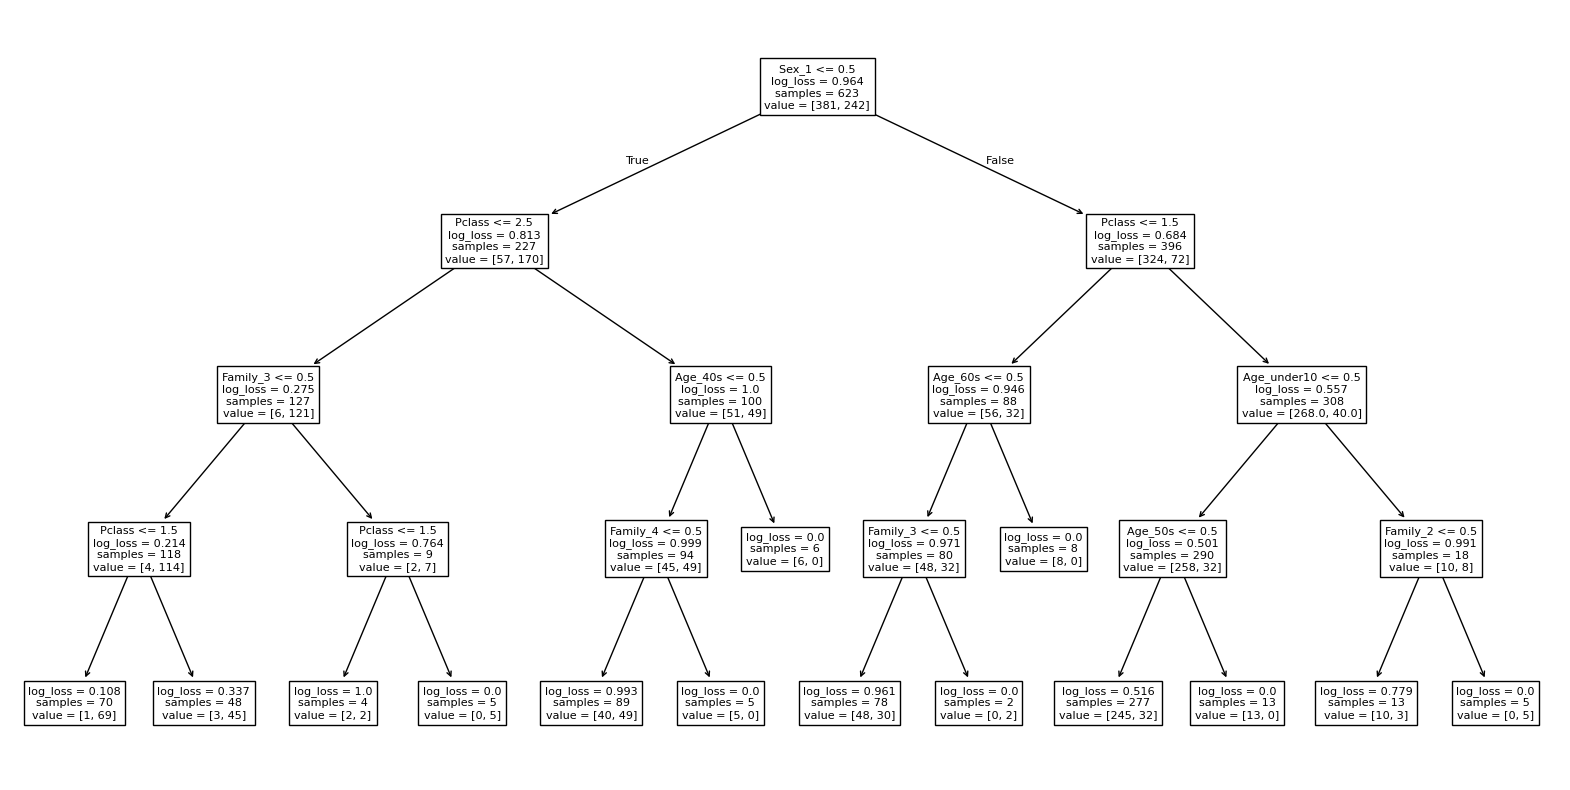

In [171]:
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names = X_train.columns)

# 앙상블 분석
### 예측력을 높이기 위해 여러 번의 데이터 분할을 통해 구축된 다수의 모형을 결합해 새로운 모형을 만드는 방법

### 앙상블(ensemble) 분석의 종류
- 배깅(bagging)
- 부스팅(boosting)
    - ADABoost(에이다 부스트)
    - Gradient boost(그래디언트 부스트)
    - XGBoost
    - LightGBM
- 랜덤배깅(random bagging)
    - randomforest

### 1) 부트스트랩
- 부트스트랩이란 원본데이터와 같은 크기의 표본을 랜덤복원추출한 샘플 데이터
- 복원 추출이기 때문에 하나의 부트스트랩에는 같은 데이터가 여러 번 추출될 수도 있다.

### 2) 배깅 - 다수결로 최고 점수의 모델 선정
- 여러 개의 부트스트랩을 분석하고 결과를 집계하는 알고리즘
- 앙상블 분석에서 각각의 모델을 분류기(classifier)라고 함. 흔히 의사결정나무를 사용함
- 여러 개의 분류기에 의한 결과를 놓고 다수결에 의해 최종 결과값을 선정하는 보팅(voting)으로 결정
    - 모델 1의 결과 = a
    - 모델 2의 결과 = a
    - 모델 3의 결과 = b
    - 모델 4의 결과 = b
    - 모델 5의 결과 = a
    - 5개의 부트스트랩과 5가지 모델로 분석한 결과
    - a가 3, b가 2로 나왔으므로 다수결에 의해 최종 결과는 a가 된다

In [172]:
from sklearn.ensemble import BaggingClassifier

In [174]:
bc = BaggingClassifier(n_estimators = 80, n_jobs = 10, random_state = 7)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.8134328358208955
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       168
           1       0.83      0.63      0.72       100

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.81       268



In [176]:
bc = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 4, random_state = 8), n_estimators = 500, n_jobs = 10, random_state = 8)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.832089552238806
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       168
           1       0.90      0.62      0.73       100

    accuracy                           0.83       268
   macro avg       0.85      0.79      0.81       268
weighted avg       0.84      0.83      0.82       268



In [177]:
from sklearn.svm import SVC

In [178]:
bc = BaggingClassifier(estimator = SVC(), n_estimators = 500, n_jobs = 10, random_state = 8)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

0.8134328358208955
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       168
           1       0.80      0.67      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



### 3) 부스팅 - 잘못 분류한 것을 다시 분석해 단점을 보완 (오답노트 공부)
- 부스팅은 여러 개의 모형을 구축한다는 점에서 배깅과 비슷하지만, 배깅은 각 분류기(모델)가 독립적인데 반해
- 부스팅은 독립적이지 않고 서로 연관되어 있다.
- 부스팅은 이전 모델을 구축한 뒤 다음 모델을 구축할 때 이전 분류기에서 잘못 분류된 데이터에 더 큰 가중치를 줘 부트스트랩을 구성하고 재학습해 점차 강한 모델을 만들어나감
- 부트스트랩을 재구성하는 과정에서 잘못 분류된 데이터에 더 큰 가중치를 줘 표본을 추출하기 때문에 훈련 오차를 빠르게 줄일 수 있음
- 따라서 예측 성능 또한 배깅보다 뛰어나다
#### (1) 부스팅의 종류

- ADABoosting (에이다 부스팅)
    - 오류에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
    - 오류를 최소화하는 방향성을 가지고 반복적으로 가중치를 업데이트해 성능 향상
    - decisionTreeClassifier(max_depth = 1)을 사용하는 아주 약한 학습기
    - 순차적으로 학습해야 하므로 멀티코어 사용 불가, 분석시간 오래 걸림

In [179]:
from sklearn.ensemble import AdaBoostClassifier

In [184]:
ada = AdaBoostClassifier(n_estimators = 2000, learning_rate = 0.1, random_state = 8)
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8134328358208955
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       168
           1       0.78      0.70      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



### (2) 그래디언트 부스팅(GradientTreeBoosting)
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리 생성
- 무작위성은 없지만 강력한 사전 가지치기가 사용됨
- 오류에 가중치를 부여하면서 부스팅을 수행하는 점에서는 동일하나 가중치 업데이트를 경사하강법을 이용한다는 점이 다름
- 약한 학습기의 순차적인 예측 오류 보정을 통해서 학습을 수행하기 때문에 멀티코어 병렬 연산이 안됨 -> 분석에 오랜 시간 소요

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [187]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 8, learning_rate = 0.1)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8283582089552238
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.84      0.67      0.74       100

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



### (3) XGBoost - 추가 설치 필요
- 그래디언터부스팅의 느린 속도 및 과적합 문제를 해결
- 멀티 코어 분석 지원
- 자체 과적합 규제 기능
- 더이상 긍정적인 영향이 없는 가지에 대한 가지치기 기능
- 교차검증 기능 자체 내장, 조기 중단 기능
- 결측값 자체 처리

In [193]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 653.6 kB/s eta 0:03:12
   ---------------------------------------- 0.7/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 3.4/124.9 MB 21.7 MB/s eta 0:00:06
   - -------------------------------------- 4.3/124.9 MB 22.9 MB/s eta 0:00:06
   - -------------------------------------- 4.4/124.9 MB 18.6 MB/s eta 0:00:07
   - -------------------------------------- 4.4/124.9 MB 15.6 MB/s eta 0:00:08
   - -------------------------------------- 4.5/124.9 MB 13.7 MB/s eta 0:00:09
   - -------------------------------------- 4.6/124.9 MB 12.3 MB/s eta 0:00:10
   - -------------------------------------- 4.9/124.9 MB 11.2 MB/s eta 0:00:11
   -- ------------------------------------- 6.3/124.9 MB 13.1 MB/s eta 0:00:10
   -- ------------------------------------- 8.7/124.9 MB 16.4 MB/s e

In [194]:
from xgboost import XGBClassifier

In [199]:
xgb = XGBClassifier(n_estimators = 1000, learing_rate = 0.7, max_depth = 3, random_state = 8)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

C:\Users\5-08\miniforge3\envs\fintech\lib\site-packages\xgboost\core.py:158: UserWarning: [12:46:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


0.8097014925373134
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       168
           1       0.85      0.60      0.70       100

    accuracy                           0.81       268
   macro avg       0.82      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268



### (4) lightGBM
- XGBoost에 비해 속도가 빠르고 메모리 사용량이 적음
- 10,000건 이하의 크기가 작은 데이터 세트에서 과적합 발생 위험이 있음
- 보통 트리 기반 알고리즘은 균형 트리 분할을 사용해 트리의 균형을 맞추기 때문에 시간이 오래 걸림
- lightgbm은 트리의 균형을 맞추지 않고 최대 손실값을 가지는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 트리를 생성
- 학습을 반복할수록 예측 오류 손실을 최소화하게 되기 때문에 균형 트리보다 성능은 좋고 속도는 빨라짐

In [200]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 23.1 MB/s eta 0:00:00


In [201]:
from lightgbm import LGBMClassifier

In [206]:
lgbm = LGBMClassifier(n_estimators = 1000, max_depth = 3, learning_rate = 0.1, random_state = 8, n_jobs = 10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[LightGBM] [Info] Number of positive: 242, number of negative: 381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388443 -> initscore=-0.453862
[LightGBM] [Info] Start training from score -0.453862
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### (5). 랜덤배깅(랜덤 포레스트, randomforest)
- 랜덤포레스트(RandomForest)는 서로 상관이 없는 나무들로 이뤄진 숲을 의미
- 방법은 배깅과 비슷하지만 배깅에 더 많은 무작위성을 주는 분석 기법
- 많은 무작위성으로 생성된 서로 다른 여러 개의 트리로 구성
- 여러 개의 약한 트리들의 선형 결합으로 최종 결과를 얻는 모델
- 분류의 경우 다수결로 최종 결과를 구함
- 회귀의 경우 평균이나 중앙값을 구하는 방법을 사용

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rfc = RandomForestClassifier(n_estimators = 2000, random_state = 8, n_jobs = 10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8171641791044776
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       168
           1       0.81      0.66      0.73       100

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



In [188]:
from sklearn.ensemble import ExtraTreesClassifier

In [192]:
etc = ExtraTreesClassifier(n_estimators = 1000, n_jobs = 10, criterion = 'gini', max_depth = 6, random_state = 8)
etc.fit(X_train, y_train)
pred = etc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8283582089552238
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.84      0.67      0.74       100

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268

